In [1]:
import sys
sys.path.append('/storage/vbutoi/projects')
sys.path.append('/storage/vbutoi/libraries')
sys.path.append('/storage/vbutoi/projects/ESE')
sys.path.append('/storage/vbutoi/projects/UniverSeg')

import seaborn as sns
sns.set_style("darkgrid")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage/vbutoi/datasets',
))

# Results loader object does everything
from ionpy.analysis import ResultsLoader
from pathlib import Path
root = Path("/storage/vbutoi/scratch/ESE")
rs = ResultsLoader()

# For using code without restarting.
%load_ext autoreload
%autoreload 
# For using yaml configs.
%load_ext yamlmagic

In [2]:
from ese.experiment.analysis.inference import load_cal_inference_stats

inference_path = root / "inference/12_13_23_WMH_EdgeStats"
dataset = "WMH"

cal_inference_info = load_cal_inference_stats(
    log_dir=inference_path,
)

In [3]:
cal_inference_info.keys()

dict_keys(['pixel_info_dicts', 'image_info_df', 'metadata'])

In [4]:
metadata = cal_inference_info['metadata']

In [5]:
record_name = list(cal_inference_info["pixel_info_dicts"].keys())[0]

## Pixel-level Analysis

In [6]:
# from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence
# from ese.experiment.analysis.utils import select_pixel_dict

# for split in ["cal"]: 
#     split_preds_dict = select_pixel_dict(
#         pixel_meter_logdict=cal_inference_info["pixel_info_dicts"], 
#         metadata=cal_inference_info["metadata"],
#         kwargs={"dataset.split": split}
#     ) 
#     # Plot the accuracy vs confidence for this split.
#     viz_accuracy_vs_confidence(
#         split_preds_dict,
#         title=f"{dataset} Confidence vs Accuracy per (Bin and Predicted Label, {split} split)",
#         x="pred_label",
#         col="bin_num",
#         kind="bar",
#         facet_kws={'sharey': True, 'sharex': False}
#         )

In [7]:
# from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence

# # Plot the accuracy vs confidence for this split.
# viz_accuracy_vs_confidence(
#     cal_inference_info["pixel_info_dicts"][record_name],
#     title=f"{dataset} Confidence vs Accuracy per (Bin and Num Neighbors)",
#     x="num_neighbors",
#     col="bin_num",
#     relative_props=True,
#     facet_kws={'sharey': True, 'sharex': False},
#     )

In [8]:
# from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence

# for label in [0, 1]: 
#     # Plot the accuracy vs confidence for this split.
#     viz_accuracy_vs_confidence(
#         cal_inference_info["pixel_info_dicts"][record_name],
#         title=f"{dataset} Confidence vs Accuracy per (Bin and Num Neighbors, label: {label})",
#         x="num_neighbors",
#         col="bin_num",
#         relative_props=False,
#         add_edge_props=True,
#         label=label,
#         facet_kws={'sharey': True, 'sharex': False},
#         )

## Image-level Analysis

In [9]:
image_info_df = cal_inference_info['image_info_df']

In [10]:
from ese.experiment.analysis.utils import reorder_splits

unique_image_df = reorder_splits(image_info_df)

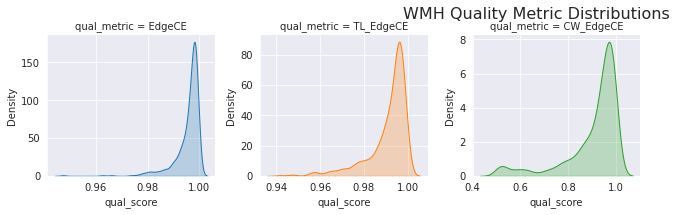

In [11]:
from ese.experiment.analysis.err_diagrams import viz_quality_metric_distributions

viz_quality_metric_distributions(
    unique_image_df, 
    title=f"{dataset} Quality Metric Distributions",
    col_wrap=5
)

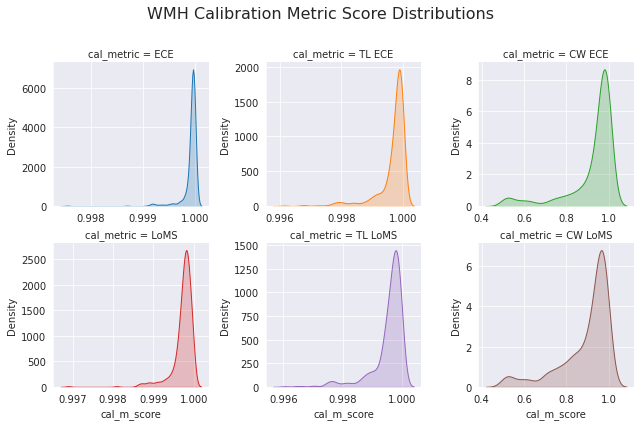

In [12]:
from ese.experiment.analysis.err_diagrams import viz_calibration_metric_distributions

viz_calibration_metric_distributions(
    unique_image_df, 
    title=f"{dataset} Calibration Metric Score Distributions",
    col_wrap=3
)

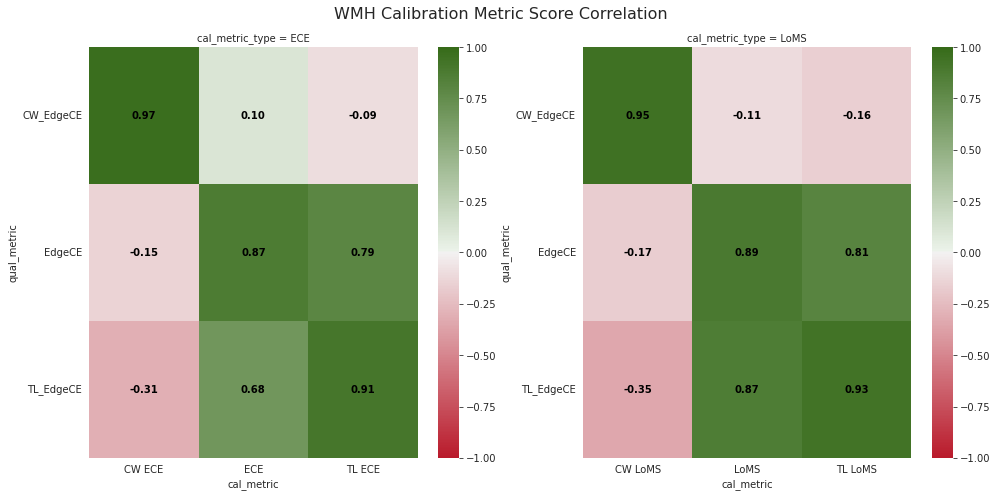

In [13]:
from ese.experiment.analysis.err_diagrams import viz_cal_metric_corr

viz_cal_metric_corr(
    unique_image_df,
    title=f"{dataset} Calibration Metric Score Correlation",
    heatmap_row="qual_metric",
    heatmap_col="cal_metric",
    col="cal_metric_type",
    height=7
)

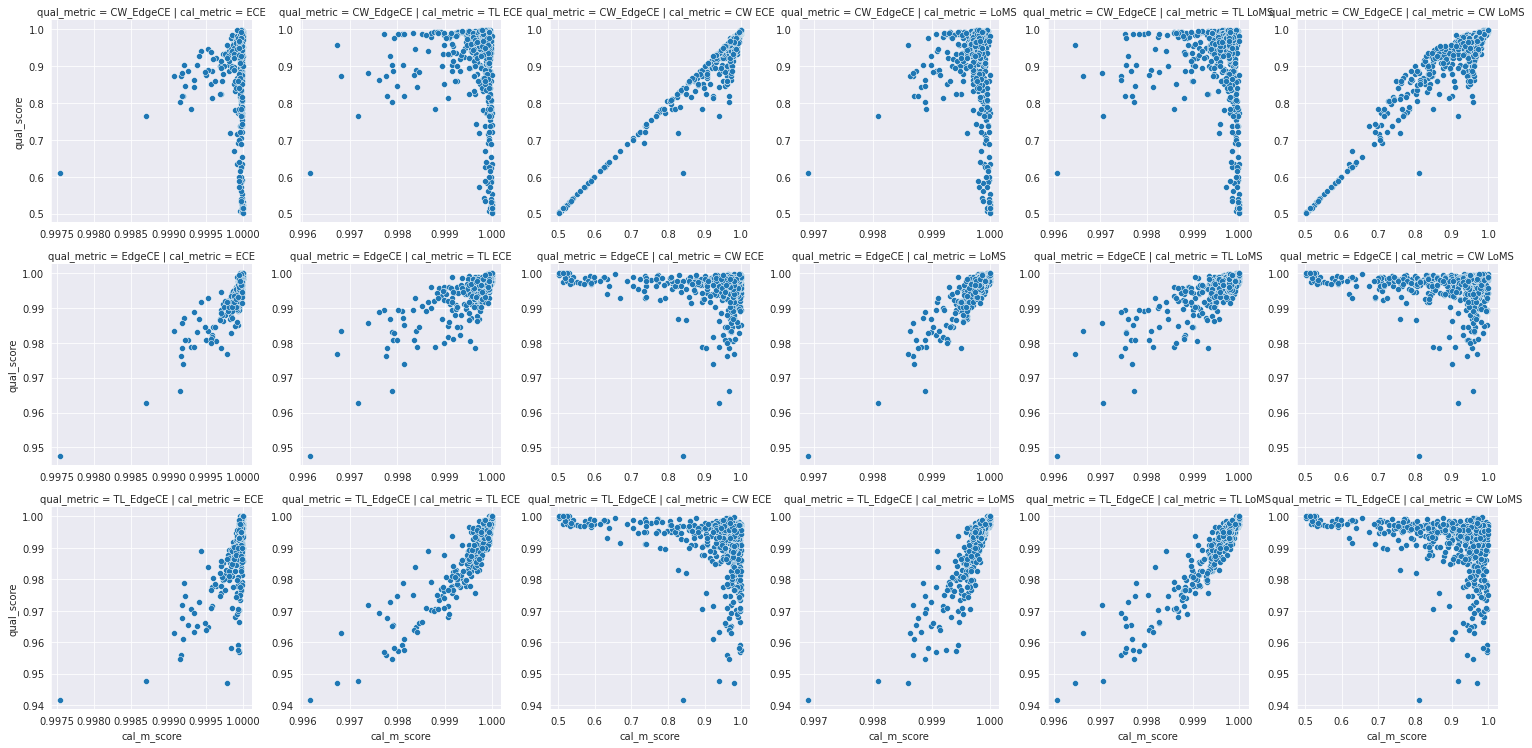

In [16]:
import matplotlib.pyplot as plt

df_qm_sorted = unique_image_df.sort_values(by=["qual_metric", "cal_metric_type"])
g = sns.relplot(
    df_qm_sorted, 
    x="cal_m_score", 
    y="qual_score", 
    col="cal_metric", 
    row="qual_metric", 
    height=3.5, 
    aspect=1,
    facet_kws={'sharey': False, 'sharex': False}
    )
# g.set(xlim=(0, 1), ylim=(0, 1))
g.tight_layout()
plt.show()

In [ ]:
# g = sns.relplot(
#     df_qm_sorted, 
#     x="log_true_lab_amount", 
#     y="qual_score", 
#     hue="qual_metric", 
#     col="qual_metric", 
#     row="label",
#     height=4, 
#     aspect=1,
#     facet_kws={'sharey': False, 'sharex': False}
#     )
# #g.set(ylim=(0, 1))
# g.tight_layout()

In [ ]:
# g = sns.relplot(
#     df_qm_sorted, 
#     x="log_true_lab_amount", 
#     y="cal_m_score", 
#     hue="cal_metric", 
#     col="cal_metric", 
#     row="label",
#     height=4,
#     aspect=1,
#     facet_kws={'sharey': False, 'sharex': False}
#     )
# g.tight_layout()